# Clean data and explore weather 

Data source: 

Looking in region Vail, but there are many places around it so the weather should be pretty much the same

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [12]:
file = '../../Data/VacationPlanner/vail_weather.csv'

df = pd.read_csv(file)
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,DLY-TAVG-NORMAL,DLY-DUTR-NORMAL,DLY-TMAX-NORMAL,DLY-TMIN-NORMAL,DLY-TAVG-STDDEV,DLY-DUTR-STDDEV,DLY-TMAX-STDDEV,DLY-TMIN-STDDEV
0,GHCND:USC00058575,VAIL CO US,2531.1,39.6394,-106.3538,20100101,0,0,0,0,...,162,73,16.1,21.8,27.0,5.2,7.4,7.8,7.4,9.2
1,GHCND:USC00058575,VAIL CO US,2531.1,39.6394,-106.3538,20100102,0,0,0,0,...,162,72,16.1,21.9,27.1,5.1,7.4,7.8,7.4,9.3
2,GHCND:USC00058575,VAIL CO US,2531.1,39.6394,-106.3538,20100103,0,0,0,0,...,163,72,16.1,22.1,27.1,5.1,7.4,7.9,7.4,9.3
3,GHCND:USC00058575,VAIL CO US,2531.1,39.6394,-106.3538,20100104,0,0,0,0,...,163,72,16.1,22.2,27.2,5.0,7.5,7.9,7.4,9.3
4,GHCND:USC00058575,VAIL CO US,2531.1,39.6394,-106.3538,20100105,0,0,0,0,...,164,72,16.1,22.3,27.3,5.0,7.5,7.9,7.4,9.4


### Description of the data types in the data

| DATA TYPE               | DESCRIPTION                                                                                                |
|-------------------------|------------------------------------------------------------------------------------------------------------|
| DLY-DUTR-NORMAL         | Long-term averages of daily diurnal temperature range                                                      |
| DLY-DUTR-STDDEV         | Long-term standard deviations of daily diurnal temperature range                                           |
| DLY-TAVG-NORMAL         | Long-term averages of daily average temperature                                                            |
| DLY-TAVG-STDDEV         | Long-term standard deviations of daily average temperature                                                 |
| DLY-TMAX-NORMAL         | Long-term averages of daily maximum temperature                                                            |
| DLY-TMAX-STDDEV         | Long-term standard deviations of daily maximum temperature                                                 |
| DLY-TMIN-NORMAL         | Long-term averages of daily minimum temperature                                                            |
| DLY-TMIN-STDDEV         | Long-term standard deviations of daily minimum temperature                                                 |
| DLY-PRCP-25PCTL         | 25th percentiles of daily nonzero precipitation totals for 29-day windows centered on each day of the year |
| DLY-PRCP-50PCTL         | 50th percentiles of daily nonzero precipitation totals for 29-day windows centered on each day of the year |
| DLY-PRCP-75PCTL         | 75th percentiles of daily nonzero precipitation totals for 29-day windows centered on each day of the year |
| DLY-PRCP-PCTALL-GE001HI | Probability of precipitation >= 0.01 inches for 29-day windows centered on each day of the year            |
| DLY-PRCP-PCTALL-GE010HI | Probability of precipitation >= 0.10 inches for 29-day windows centered on each day of the year            |
| DLY-PRCP-PCTALL-GE050HI | Probability of precipitation >= 0.50 inches for 29-day windows centered on each day of the year            |
| DLY-PRCP-PCTALL-GE100HI | Probability of precipitation >= 1.00 inches for 29-day windows centered on each day of the year            |
| DLY-SNOW-25PCTL         | 25th percentiles of daily nonzero snowfall totals for 29-day windows centered on each day of the year      |
| DLY-SNOW-50PCTL         | 50th percentiles of daily nonzero snowfall totals for 29-day windows centered on each day of the year      |
| DLY-SNOW-75PCTL         | 75th percentiles of daily nonzero snowfall totals for 29-day windows centered on each day of the year      |
| DLY-SNOW-PCTALL-GE001TI | Probability of snowfall >= 0.1 inches for 29-day windows centered on each day of the year                  |
| DLY-SNOW-PCTALL-GE010TI | Probability of snowfall >= 1.0 inches for 29-day windows centered on each day of the year                  |
| DLY-SNOW-PCTALL-GE030TI | Probability of snowfall >= 3.0 inches for 29-day windows centered on each day of the year                  |
| DLY-SNOW-PCTALL-GE050TI | Probability of snowfall >= 5.0 inches for 29-day windows centered on each day of the year                  |
| DLY-SNOW-PCTALL-GE100TI | Probability of snowfall >= 10 inches for 29-day windows centered on each day of the year                   |
| MTD-PRCP-NORMAL         | Long-term average month-to-date precipitation totals                                                       |
| MTD-SNOW-NORMAL         | Long-term average month-to-date snowfall totals                                                            |
| YTD-PRCP-NORMAL         | Long-term average year-to-date precipitation totals                                                        |
| YTD-SNOW-NORMAL         | Long-term average year-to-date snowfall totals                                                             |
| DLY-CLDD-BASE45         | Long-term averages of daily cooling degree days with base 45F                                              |
| DLY-CLDD-BASE50         | Long-term averages of daily cooling degree days with base 50F                                              |
| DLY-CLDD-BASE55         | Long-term averages of daily cooling degree days with base 55F                                              |
| DLY-CLDD-BASE57         | Long-term averages of daily cooling degree days with base 57F                                              |
| DLY-CLDD-BASE60         | Long-term averages of daily cooling degree days with base 60F                                              |
| DLY-CLDD-BASE70         | Long-term averages of daily cooling degree days with base 70F                                              |
| DLY-CLDD-BASE72         | Long-term averages of daily cooling degree days with base 72F                                              |
| DLY-CLDD-NORMAL         | Long-term averages of daily cooling degree days with base 65F                                              |
| DLY-HTDD-BASE40         | Long-term averages of daily heating degree days with base 40F                                              |
| DLY-HTDD-BASE45         | Long-term averages of daily heating degree days with base 45F                                              |
| DLY-HTDD-BASE50         | Long-term averages of daily heating degree days with base 50F                                              |
| DLY-HTDD-BASE55         | Long-term averages of daily heating degree days with base 55F                                              |
| DLY-HTDD-BASE57         | Long-term averages of daily heating degree days with base 57F                                              |
| DLY-HTDD-BASE60         | Long-term averages of daily heating degree days with base 60F                                              |
| DLY-HTDD-NORMAL         | Long-term averages of daily heating degree days with base 65F                                              |

## Data cleaning

-9999: missing or insufficient data (text data)   
-7777: a non-zero value that would round to zero  
-6666: parameter undefined; insufficient occurrences to compute   



1. Convert the date_format.
2. Crop the data to interesting range in order from December to April

In [13]:
# 1. Check for missing data
# df.isnull().sum().sum()

df = df.replace({-9999: np.nan, -6666: np.nan, -7777:0})
df.isnull().sum()

STATION                     0
STATION_NAME                0
ELEVATION                   0
LATITUDE                    0
LONGITUDE                   0
DATE                        0
DLY-CLDD-BASE45             0
DLY-CLDD-BASE50             0
DLY-CLDD-BASE55             0
DLY-CLDD-BASE57             0
DLY-CLDD-BASE60             0
DLY-CLDD-NORMAL             0
DLY-CLDD-BASE70             0
DLY-CLDD-BASE72             0
DLY-HTDD-BASE40             0
DLY-HTDD-BASE45             0
DLY-HTDD-BASE50             0
DLY-HTDD-BASE55             0
DLY-HTDD-BASE57             0
DLY-HTDD-BASE60             0
DLY-HTDD-NORMAL             0
DLY-PRCP-25PCTL             0
DLY-SNOW-25PCTL            40
DLY-PRCP-50PCTL             0
DLY-SNOW-50PCTL            40
DLY-PRCP-75PCTL             0
DLY-SNOW-75PCTL            40
MTD-PRCP-NORMAL             0
MTD-SNOW-NORMAL             0
YTD-PRCP-NORMAL             0
YTD-SNOW-NORMAL             0
DLY-PRCP-PCTALL-GE001HI     0
DLY-PRCP-PCTALL-GE010HI     0
DLY-PRCP-P

In [14]:
# 2. Date format

def format_date(x):
    x = str(x)
    
    if x[4:6] in ['12', '11', '10']:
        x = '2018-' + x[4:6] + '-' + x[6:8]
    else:
        x = '2019-' + x[4:6] + '-' + x[6:8]
    return x

df['date'] = df['DATE'].apply(format_date)
# df['date'] = df['DATE'].astype('str')
# df['date'] = df['date'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
# str(df['DATE'][0])
df['date'].head()



0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: date, dtype: datetime64[ns]

(0, 4.2)

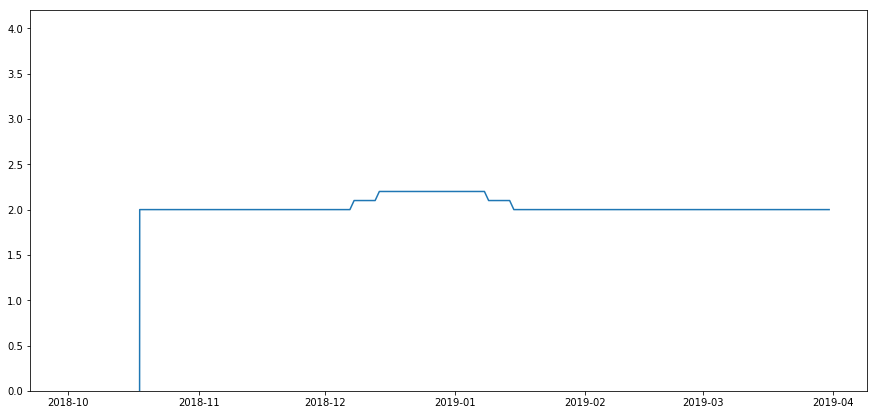

In [19]:
df = df.sort_values(by=['date'])
df = df[df['date'] < '2019-04-01']

plt.figure(figsize=(15,7))
plt.plot(df['date'], df['DLY-SNOW-50PCTL'])
plt.ylim([0, df['DLY-SNOW-75PCTL'].max()])

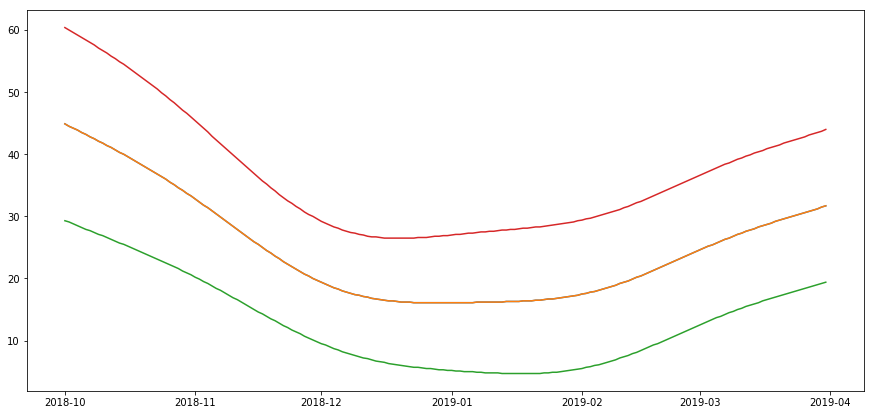

In [31]:
plt.figure(figsize=(15,7))
plt.plot(df['date'], df['DLY-TAVG-NORMAL'])
lower = df['DLY-TAVG-NORMAL']-df['DLY-TAVG-STDDEV']
upper = df['DLY-TAVG-NORMAL']+df['DLY-TAVG-STDDEV']
# lower.shape

plt.plot(df['date'], df['DLY-TAVG-NORMAL'])
plt.plot(df['date'], df['DLY-TMIN-NORMAL'])
plt.plot(df['date'], df['DLY-TMAX-NORMAL'])
# plt.fill_between(df['date'].values, lower, upper)
# plt.ylim([0, df['DLY-SNOW-75PCTL'].max()])

In [23]:
x = df['DLY-TAVG-NORMAL']+df['DLY-TAVG-STDDEV']

273    44.9
274    44.5
275    44.2
276    43.9
277    43.5
278    43.2
279    42.8
280    42.5
281    42.1
282    41.8
283    41.4
284    41.1
285    40.7
286    40.3
287    40.0
288    39.6
289    39.2
290    38.8
291    38.4
292    38.0
293    37.6
294    37.2
295    36.8
296    36.4
297    36.0
298    35.5
299    35.1
300    34.6
301    34.2
302    33.7
       ... 
60     24.9
61     25.2
62     25.4
63     25.7
64     26.0
65     26.3
66     26.5
67     26.8
68     27.1
69     27.3
70     27.6
71     27.8
72     28.0
73     28.3
74     28.5
75     28.7
76     28.9
77     29.2
78     29.4
79     29.6
80     29.8
81     30.0
82     30.2
83     30.4
84     30.6
85     30.8
86     31.0
87     31.2
88     31.5
89     31.7
Name: DLY-TAVG-NORMAL, Length: 182, dtype: float64